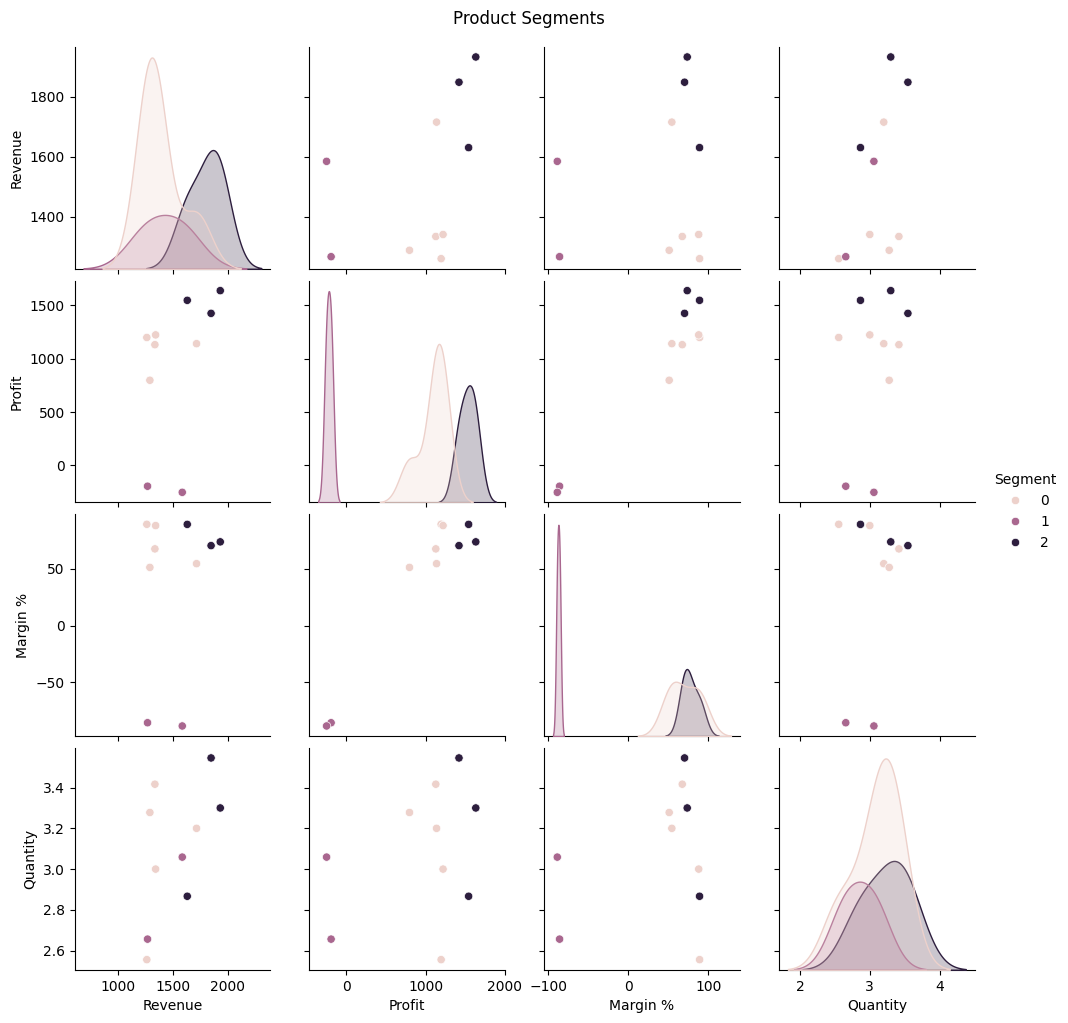

✅ Product clusters saved to data/processed/product_clusters.csv


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/processed/final_data.csv')
df.head()
grouped = df.groupby('Product').agg({
    'Revenue': 'mean',
    'Profit': 'mean',
    'Margin %': 'mean',
    'Quantity': 'mean'
}).reset_index()
features = ['Revenue', 'Profit', 'Margin %', 'Quantity']
X = grouped[features]
kmeans = KMeans(n_clusters=3, random_state=42)
grouped['Segment'] = kmeans.fit_predict(X)
# Review average metrics by cluster
grouped.groupby('Segment')[['Revenue', 'Profit', 'Margin %', 'Quantity']].mean()

sns.pairplot(grouped, hue='Segment')
plt.suptitle("Product Segments", y=1.02)
plt.show()
grouped.to_csv('../data/processed/product_clusters.csv', index=False)
print("✅ Product clusters saved to data/processed/product_clusters.csv")
